In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
import datetime

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df = pd.read_csv('/content/drive/My Drive/project/cleandataset.csv')
df=df.drop('start_date',axis=1)
df=df.drop('ad_type',axis=1)
df=df.drop('Unnamed: 0',axis=1)
df['año']=df['end_date'].str[:4]
d1=df[df['año']=='2019']
d2=df[df['año']=='2018']
d3=df[df['año']=='2020']
df4=pd.concat([d1,d2])
df=pd.concat([df4,d3])
dfechas=df['created_on'].str.split('-', expand=True)
df=pd.concat([df,dfechas], axis=1)
df['created_on']=pd.to_datetime(df['created_on'], format="%Y-%m-%d")
df['end_date']=pd.to_datetime(df['end_date'], format="%Y-%m-%d")
df['selling_time']=df['end_date']-df['created_on']
df['price/m2']=np.divide(df['price'],df['surface_total'])
df.columns=['end_date', 'created_on', 'lat', 'lon',
      'l2', 'l3', 'rooms', 'surface_total', 'surface_covered', 'price',
       'title', 'description', 'property_type', 'operation_type', 'año',
    'Año', 'Mes', 'Dia','selling_time','price/m2']
df['Mes']=pd.to_numeric(df['Mes'])
df['Año']=pd.to_numeric(df['Año'])
df['Dia']=pd.to_numeric(df['Dia'])
df=df.fillna(0)
df['selling_time']=df['selling_time'].apply(lambda x: x.days)
dfnum=df[['lat', 'lon', 'rooms','surface_total', 'surface_covered', 'price', 'Año', 'Mes', 'Dia','selling_time','price/m2']]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.


In [46]:
dfnum

,lat,lon,rooms,surface_total,surface_covered,price,Año,Mes,Dia,selling_time,price/m2
0,10.998798,-74.820729,4.0,546.0,306.0,1.000000e+09,2018,12,8,229,1.831502e+06
1,8.746055,-75.874554,4.0,0.0,98.0,1.100000e+08,2018,9,6,258,0.000000e+00
2,8.761538,-75.892666,4.0,0.0,98.0,1.350000e+08,2018,9,6,258,0.000000e+00
3,8.760989,-75.874927,3.0,120.0,130.0,1.900000e+08,2018,9,6,400,1.583333e+06
4,3.362849,-76.540670,4.0,0.0,280.0,5.300000e+08,2018,9,6,275,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
583265,10.930616,-75.022459,4.0,800.0,204.0,1.183182e+09,2019,2,27,355,1.478978e+06
586800,10.519894,-75.469126,4.0,900.0,350.0,1.550000e+09,2019,2,27,329,1.722222e+06
586801,6.248410,-75.565514,3.0,600.0,250.0,1.600000e+09,2019,2,27,329,2.666667e+06
587152,6.142827,-75.609026,5.0,3000.0,750.0,3.900000e+09,2019,2,27,346,1.300000e+06


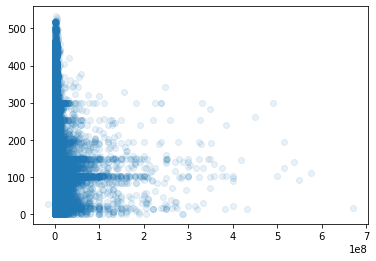

In [97]:
plt.scatter((df.iloc[:,19]),(df['selling_time']), alpha=0.1)

[1000000, 10000000, 0, 1e-08]

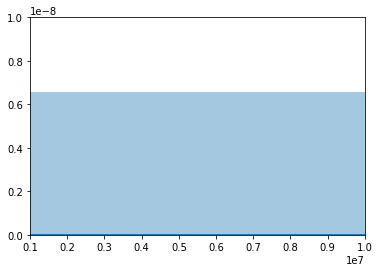

In [83]:
sns.distplot(dfnum[dfnum['price/m2']>0])
plt.axis([1000000, 10000000, 0, 0.00000001])

In [26]:
dfnum.iloc[1]

lat                8.746055e+00
lon               -7.587455e+01
rooms              4.000000e+00
surface_total      0.000000e+00
surface_covered    9.800000e+01
price              1.100000e+08
Año                2.018000e+03
Mes                9.000000e+00
Dia                6.000000e+00
selling_time       2.580000e+02
Name: 1, dtype: float64

In [0]:
q1=df['selling_time'].quantile(0.5)

def vel(x):
  if x<q1:
    x=0  
  else:
    x=1
  return(x) 

In [7]:
df['selling_time'].apply(lambda x:vel(x))

0         1
1         1
2         1
3         1
4         1
         ..
583265    1
586800    1
586801    1
587152    1
588989    1
Name: selling_time, Length: 492199, dtype: int64

In [13]:
print('rápidos', df['selling_time'].sum()/len(df['selling_time']),'%')
print('lentos',100-(df['selling_time'].sum()/len(df['selling_time'])),'%')

rápidos 79.55951149839801 %
lentos 20.44048850160199 %


[0, 14, -80, -70]

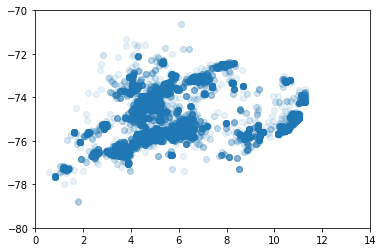

In [26]:
plt.scatter(dfnum.iloc[:,0],dfnum.iloc[:,1], alpha=0.1)
plt.axis([0, 14, -80, -70])

In [0]:
df['selling_time'].apply(lambda x:vel(x))

0         Slow
1         Slow
2         Slow
3         Slow
4         Slow
          ... 
583265    Slow
586800    Slow
586801    Slow
587152    Slow
588989    Slow
Name: selling_time, Length: 492199, dtype: object